In [98]:
import pandas as pd
import seaborn as sns
import pickle

path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"

In [99]:
#Test sur le csv concat
#url git
url = 'https://github.com/Pioterr/projet_sise_stock/blob/main/concat.zip?raw=true'
url2 = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/concat_prix_m2_lati.csv"
#url2 = 'C:/Users/pterron/Documents/projet_python/Application_ml/Depot_data/concat_prix_m2_lati.csv'

# Chargez le fichier CSV
#Df = pd.read_csv(filepath_or_buffer= url ,sep='|', compression='zip')
Df = pd.read_csv(filepath_or_buffer= url2 ,sep='|')

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


In [100]:
Df.head()

Nature mutation  Valeur fonciere Type de voie  Code postal  \
0           Vente          90000.0          RUE       1380.0   
1           Vente          67000.0          ALL       1000.0   
2           Vente          76200.0          RUE       1000.0   
3           Vente         130000.0          RUE       1160.0   
4           Vente         224750.0          RUE       1160.0   

                 Commune Code departement  Code commune  Nombre de lots  \
0  SAINT-CYR-SUR-MENTHON                1           343               0   
1        BOURG-EN-BRESSE                1            53               1   
2        BOURG-EN-BRESSE                1            53               2   
3               VARAMBON                1           430               0   
4                  PRIAY                1           314               0   

   Code type local   Type local  Surface reelle bati  \
0              1.0       Maison                150.0   
1              2.0  Appartement                 45.0   
2              2.0  Appartement                 68.0   
3              1.0       Maison                 80.0   
4              1.0       Maison                115.0   

   Nombre pieces principales  Nature culture  Surface terrain  month  year  \
0                        3.0               1            347.0      1  2018   
1                        1.0               0              0.0      1  2018   
2                        3.0               0              0.0      1  2018   
3                        3.0               1             55.0      1  2018   
4                        5.0               1            673.0      1  2018   

   Prix m2 moyen region  Prix m2 moyen commune   latitude  longitude  
0           2000.490112            1595.038363  46.275401   4.967571  
1           2000.490112            1473.508812  46.205152   5.246021  
2           2000.490112            1473.508812  46.205152   5.246021  
3           2000.490112            1388.578501  46.043393   5.294794  
4           2000.490112            1835.850009  46.019752   5.285234

In [101]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955342 entries, 0 to 1955341
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Nature mutation            object 
 1   Valeur fonciere            float64
 2   Type de voie               object 
 3   Code postal                float64
 4   Commune                    object 
 5   Code departement           object 
 6   Code commune               int64  
 7   Nombre de lots             int64  
 8   Code type local            float64
 9   Type local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
 12  Nature culture             int64  
 13  Surface terrain            float64
 14  month                      int64  
 15  year                       int64  
 16  Prix m2 moyen region       float64
 17  Prix m2 moyen commune      float64
 18  latitude                   float64
 19  longitude                  float64
dtypes:

In [102]:
#liste des variables
var = Df.columns
var
"""
 0   Nature mutation            object 
 1   Valeur fonciere            float64
 2   Type de voie               object 
 3   Code postal                float64
 4   Commune                    object 
 5   Code departement           object 
 6   Code commune               int64  
 7   Nombre de lots             int64  
 8   Code type local            float64
 9   Type local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
 12  Nature culture             int64  
 13  Surface terrain            float64
 14  month                      int64  
 15  year                       int64  
 16  Prix m2 moyen region       float64
 17  Prix m2 moyen commune      float64
 18  latitude                   float64
 19  longitude                  float64
"""

df = Df

'\n 0   Nature mutation            object \n 1   Valeur fonciere            float64\n 2   Type de voie               object \n 3   Code postal                float64\n 4   Commune                    object \n 5   Code departement           object \n 6   Code commune               int64  \n 7   Nombre de lots             int64  \n 8   Code type local            float64\n 9   Type local                 object \n 10  Surface reelle bati        float64\n 11  Nombre pieces principales  float64\n 12  Nature culture             int64  \n 13  Surface terrain            float64\n 14  month                      int64  \n 15  year                       int64  \n 16  Prix m2 moyen region       float64\n 17  Prix m2 moyen commune      float64\n 18  latitude                   float64\n 19  longitude                  float64\n'

In [106]:

#On sépare en 4 df

df_m = df[df['Type local'] == 'Maison']
df_a = df[df['Type local'] == 'Appartement']
df_l = df[df['Type local'] == 'Local industriel. commercial ou assimilé']
df_d = df[df['Type local'] == 'Dépendance']

df_am = pd.concat([df_m, df_a], axis=0)
df_aml = pd.concat([df_m, df_a,df_l], axis=0)
var = df_am.columns


In [131]:
df_l.shape

(19849, 20)

Valeur fonciere  Code postal  Code commune  \
Valeur fonciere                   1.000000     0.151706     -0.025296   
Code postal                       0.151706     1.000000     -0.019721   
Code commune                     -0.025296    -0.019721      1.000000   
Nombre de lots                   -0.066462     0.070998     -0.103727   
Code type local                  -0.176446     0.037625     -0.092259   
Surface reelle bati               0.365176    -0.052787      0.089645   
Nombre pieces principales         0.341914    -0.013583      0.096902   
Nature culture                    0.100804    -0.066105      0.121344   
Surface terrain                   0.203940    -0.061957      0.074258   
month                             0.015092    -0.006115      0.004434   
year                              0.048134    -0.013540      0.007918   
Prix m2 moyen region              0.375840     0.282408     -0.169117   
Prix m2 moyen commune             0.451412     0.253612     -0.146424   
latitude                         -0.007487    -0.023715      0.194883   
longitude                         0.015608    -0.013673      0.008873   

                           Nombre de lots  Code type local  \
Valeur fonciere                 -0.066462        -0.176446   
Code postal                      0.070998         0.037625   
Code commune                    -0.103727        -0.092259   
Nombre de lots                   1.000000         0.611493   
Code type local                  0.611493         1.000000   
Surface reelle bati             -0.382963        -0.546983   
Nombre pieces principales       -0.333473        -0.628835   
Nature culture                  -0.846536        -0.698531   
Surface terrain                 -0.548812        -0.528269   
month                           -0.034782        -0.019637   
year                            -0.085965        -0.035826   
Prix m2 moyen region             0.349257         0.284571   
Prix m2 moyen commune            0.384980         0.318064   
latitude                        -0.011013        -0.019313   
longitude                        0.060402         0.043128   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                       0.365176                   0.341914   
Code postal                          -0.052787                  -0.013583   
Code commune                          0.089645                   0.096902   
Nombre de lots                       -0.382963                  -0.333473   
Code type local                      -0.546983                  -0.628835   
Surface reelle bati                   1.000000                   0.795436   
Nombre pieces principales             0.795436                   1.000000   
Nature culture                        0.485109                   0.436763   
Surface terrain                       0.507141                   0.442418   
month                                 0.007148                   0.004664   
year                                  0.010955                   0.001162   
Prix m2 moyen region                 -0.287148                  -0.237122   
Prix m2 moyen commune                -0.319638                  -0.257603   
latitude                              0.007189                   0.027009   
longitude                            -0.031735                  -0.027016   

                           Nature culture  Surface terrain     month  \
Valeur fonciere                  0.100804         0.203940  0.015092   
Code postal                     -0.066105        -0.061957 -0.006115   
Code commune                     0.121344         0.074258  0.004434   
Nombre de lots                  -0.846536        -0.548812 -0.034782   
Code type local                 -0.698531        -0.528269 -0.019637   
Surface reelle bati              0.485109         0.507141  0.007148   
Nombre pieces principales        0.436763         0.442418  0.004664   
Nature culture                   1.000000         0.6032

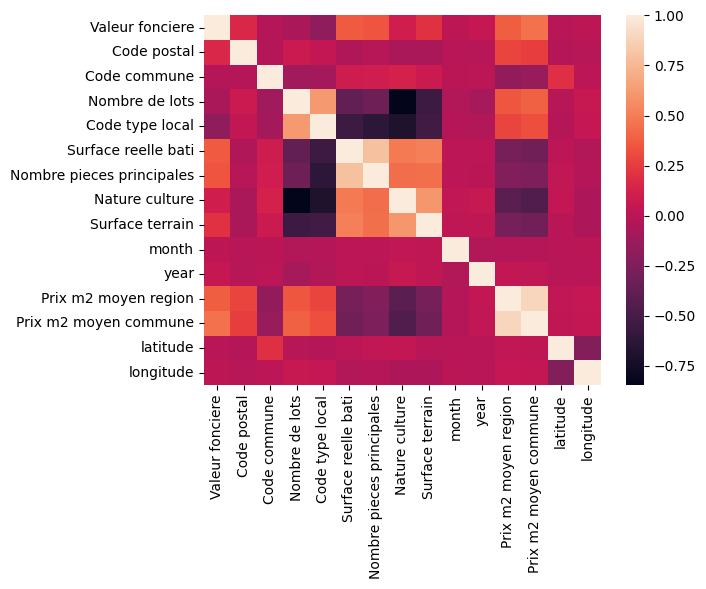

In [108]:
m = df.corr(numeric_only=True)
sns.heatmap(m)
m

In [149]:
#On prend uniquement un echantillon de notre jeu de données
df_samp = df_a.sample(n = 50000)
df_samp.head()

In [151]:
df_m.shape

(1293978, 20)

# Random forest Valeur foncière

In [154]:
# Gridcearch cv

#module
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Variable a tester
var1 = var[[10,15,17]]
print("Variables utilisé : " + str(var1))

#données de test (Appartement et maison)
Y = df_m['Valeur fonciere']
X = df_m[var1] 


param_grid = {'min_samples_split': np.arange(0.05, 0.0001, step= -0.01),  # Minimum samples required to split an internal node
            'min_samples_leaf': np.arange(0.05, 0.0001, step= -0.01)  # Minimum samples required to be a leaf node
            }


#pretraitement
#X = pd.get_dummies(data=X, columns=[var[9]])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#modèle
reg_vf = RandomForestRegressor(criterion= 'squared_error', n_estimators= 50, max_depth = 20, min_samples_split=0.01, min_samples_leaf=0.01)

#clf = GridSearchCV(reg_vf, param_grid, cv=5)

#entrainement
#clf.fit(X_train, y_train)
reg_vf.fit(X_train, y_train)

#fit
#y_pred = clf.best_estimator_.predict(X_test)
y_pred = reg_vf.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))
#print(clf.best_params_)
print(reg_vf.get_params)

#pickle.dump(reg_vf, open('reg_prix_appart.pkl', 'wb'))

Variables utilisé : Index(['Surface reelle bati', 'year', 'Prix m2 moyen commune'], dtype='object')
MSE : 60180.51612752395
R² : 0.6706350861056614
<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=20, min_samples_leaf=0.01,
                      min_samples_split=0.01, n_estimators=50)>


Df entier, n=10000

Variables utilisé : Index(['Prix m2 moyen region', 'Prix m2 moyen commune'], dtype='object')
MSE : 87522.92644522422
R² : 0.27346335769823493
{'max_depth': 10, 'min_samples_leaf': 1000, 'min_samples_split': 1500, 'n_estimators': 20}

DF entier, n=50000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen region', 'Prix m2 moyen commune',
       'latitude', 'longitude'],
      dtype='object')
MSE : 63491.785393410304
R² : 0.6312898672496676
{'max_depth': 10, 'min_samples_leaf': 1000, 'min_samples_split': 1000, 'n_estimators': 21}


Df maison, n = 50000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
MSE : 105572.18125146601
R² : -0.0003320708983423071
{'min_samples_leaf': 100000, 'min_samples_split': 70000}

Df maison, n = 50000
n estimator = 20

Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
MSE : 68699.19826873307
R² : 0.576407228084532
{'min_samples_leaf': 3000, 'min_samples_split': 4000}


Df maison, n = 50000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
MSE : 77801.06199347966
R² : 0.45672933681629757
{'max_depth': 10, 'min_samples_leaf': 5000, 'min_samples_split': 10000, 'n_estimators': 50}

Df maison, appart et local n = 50000
Variables utilisé : Index(['Type local', 'Surface reelle bati', 'Prix m2 moyen commune',
       'latitude', 'longitude'],
      dtype='object')
MSE : 80467.5572502557
R² : 0.3949600126942264
{'max_depth': 20, 'min_samples_leaf': 4000, 'min_samples_split': 7000, 'n_estimators': 50}

Df maison, appart et local n = 50000
Variables utilisé : Index(['Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'Prix m2 moyen commune', 'latitude', 'longitude'],
      dtype='object')
MSE : 80654.39393648991
R² : 0.39214708019018507
{'max_depth': 20, 'min_samples_leaf': 4000, 'min_samples_split': 7000, 'n_estimators': 50}

Df maison, appart et local n = 50000
Variables utilisé : Index(['Type local', 'Prix m2 moyen commune'], dtype='object')
MSE : 90407.52764688652
R² : 0.24257452880868857
{'max_depth': 10, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 50}

Df maison, n= 50000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 79333.91618395428
R² : 0.4290284122241096
{'max_depth': 30, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 50}

Df maison, n= 50000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
MSE : 78977.04040199518
R² : 0.43415377678921296
{'max_depth': 30, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 20}

Df maison, n= 50000
Variables utilisé : Index(['Prix m2 moyen commune'], dtype='object')
MSE : 73135.80176431849
R² : 0.5106661625501449
{'min_samples_leaf': 0.050000000000000044, 'min_samples_split': 0.050000000000000044}


Df maison, n = 50000
Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales',
       'Prix m2 moyen commune', 'latitude', 'longitude'],
      dtype='object')
MSE : 65760.9884736952
R² : 0.6043767011836625
{'min_samples_leaf': 0.050000000000000044, 'min_samples_split': 0.050000000000000044}

Df Appartement, n = 50000
Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales',
       'Prix m2 moyen commune', 'latitude', 'longitude'],
      dtype='object')
MSE : 60251.50284675407
R² : 0.6678907570879342
{'min_samples_leaf': 0.009999999999999995, 'min_samples_split': 0.009999999999999995}

Df dependance
Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales',
       'Prix m2 moyen commune', 'latitude', 'longitude'],
      dtype='object')
MSE : 77373.64239733721
R² : 0.1348178234869244

Df local
Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales',
       'Prix m2 moyen commune', 'latitude', 'longitude'],
      dtype='object')
MSE : 86969.69199811577
R² : 0.2867676286709977

### param finaux

#### maison
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 58759.54356186786
R² : 0.6887495205161014
max_depth=20, min_samples_leaf=0.01,
min_samples_split=0.01, n_estimators=50

#### appartement (n=50000)
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 56383.0561859178
R² : 0.6751022812064702
max_depth=20, min_samples_leaf=0.01,
min_samples_split=0.01, n_estimators=50

### appartment tot
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 57856.43722957848
R² : 0.6648194946528592
max_depth=20, min_samples_leaf=0.01,
min_samples_split=0.01, n_estimators=50

MSE : 60180.51612752395
{'min_samples_leaf': 0.009999999999999995, 'min_samples_split': 0.009999999999999995}


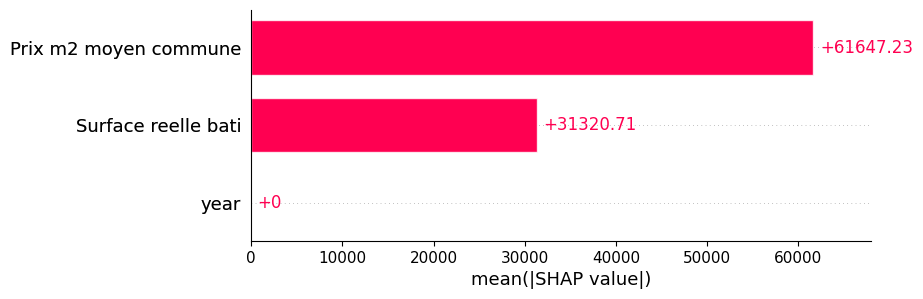

In [156]:
# Shap
import shap

#fit
g_mod = reg_vf

# Fits the explainer
explainer = shap.TreeExplainer(g_mod)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred, squared=False)
#r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
#print("R² : " + str(r2))
print(clf.best_params_)

#Graph
shap.plots.bar(shap_values)

MSE : 90407.52764688652  
{'max_depth': 10, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 50}  

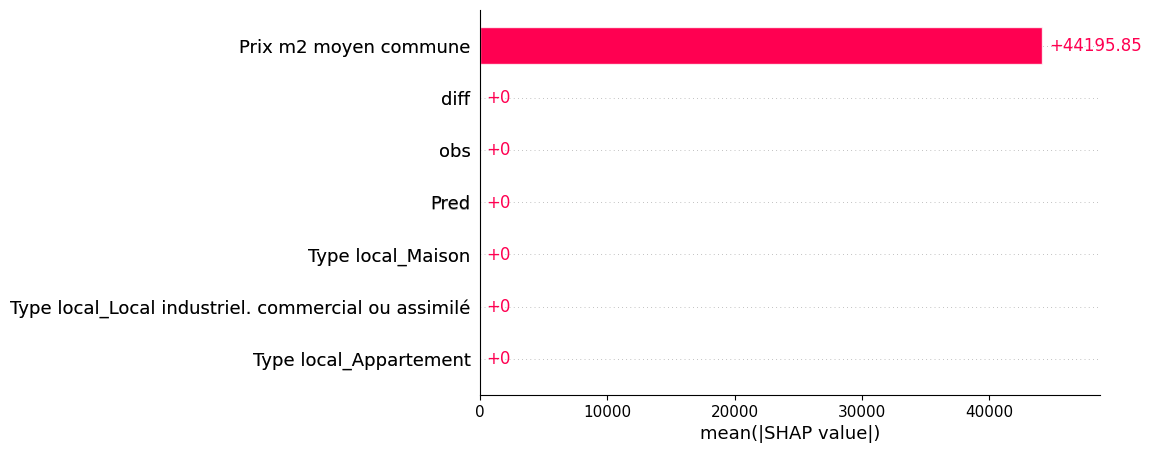


MSE : 79333.91618395428  
{'max_depth': 30, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 50}  

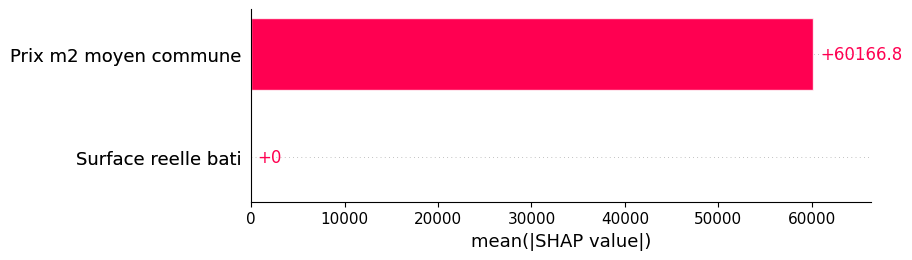


MSE : 78977.04040199518  
{'max_depth': 30, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.20000000000000018, 'n_estimators': 20}  

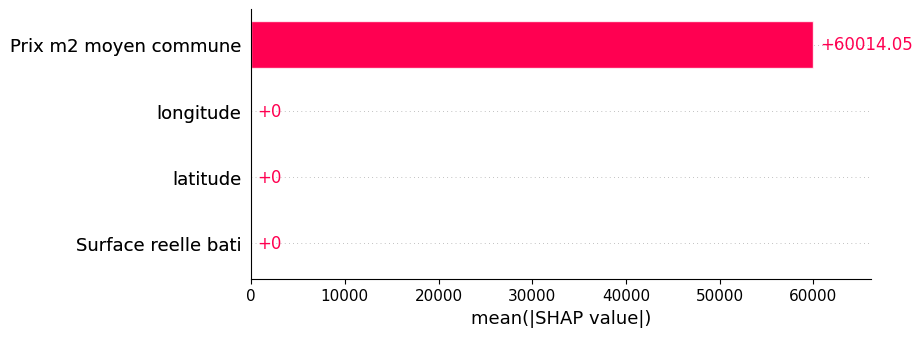  


MSE : 79972.46433514573  
{'max_depth': 10, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.40000000000000013}  

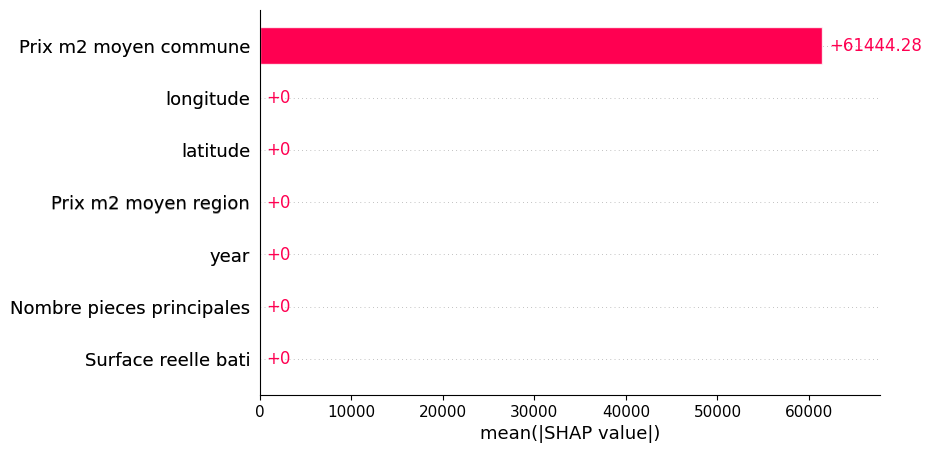  

MSE : 65760.9884736952  
{'min_samples_leaf': 0.050000000000000044, 'min_samples_split': 0.050000000000000044}  

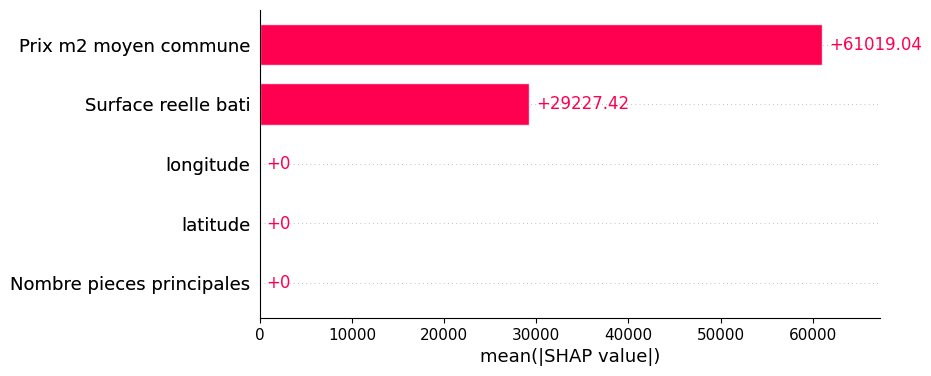  


Maison
MSE : 60251.50284675407  
{'min_samples_leaf': 0.009999999999999995, 'min_samples_split': 0.009999999999999995} --> on va partir sur ces valeurs  

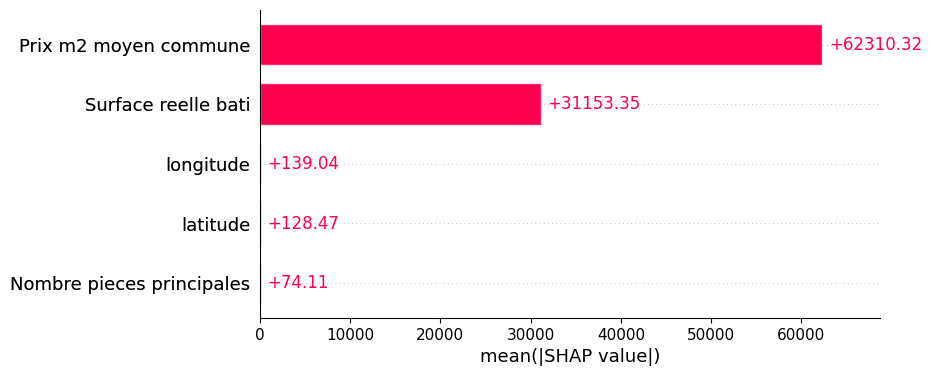



Appartement
MSE : 63462.89221899459  
{'min_samples_leaf': 0.009999999999999995, 'min_samples_split': 0.009999999999999995}  

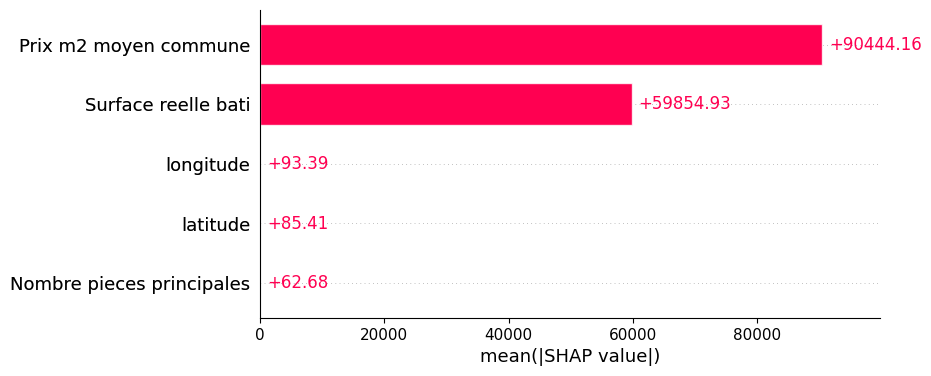


MSE : 60180.51612752395  
{'min_samples_leaf': 0.009999999999999995, 'min_samples_split': 0.009999999999999995}  

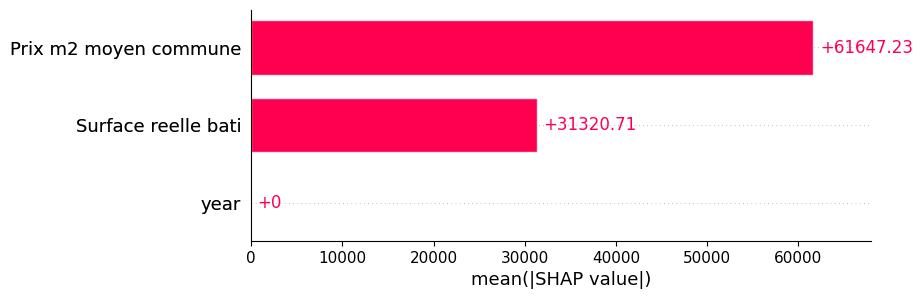

In [32]:
Verif = X_test
Verif['Pred'] = y_pred
Verif['obs'] = y_test
Verif['diff'] = Verif['obs']-Verif['Pred']

In [34]:
Verif.sort_values(by='diff')

Prix m2 moyen commune  Type local_Appartement  \
656262             2651.548099                   False   
482169             8939.064774                    True   
1464651            3364.615993                    True   
464752             7538.036637                    True   
1022381           10617.662065                    True   
...                        ...                     ...   
41001              1886.890516                   False   
1779052            1552.134697                   False   
1684244            1646.727376                   False   
276602             1894.074161                   False   
1140430            1825.891973                   False   

         Type local_Local industriel. commercial ou assimilé  \
656262                                                True     
482169                                               False     
1464651                                              False     
464752                                               False     
1022381                                              False     
...                                                    ...     
41001                                                False     
1779052                                              False     
1684244                                              False     
276602                                               False     
1140430                                              False     

         Type local_Maison           Pred       obs           diff  
656262               False  217544.364146       1.0 -217543.364146  
482169               False  217544.364146       1.0 -217543.364146  
1464651              False  217544.364146       1.0 -217543.364146  
464752               False  217544.364146     100.0 -217444.364146  
1022381              False  217544.364146     300.0 -217244.364146  
...                    ...            ...       ...            ...  
41001                 True  122381.145242  446200.0  323818.854758  
1779052               True  122381.145242  452600.0  330218.854758  
1684244               True  122381.145242  460000.0  337618.854758  
276602                True  130050.675525  476000.0  345949.324475  
1140430               True  122381.145242  487600.0  365218.854758  

[15000 rows x 7 columns]

On observe des biens vendu pour des sommes ridicules (Euros symbolique), ou des prix aberrants

# SGDRegressor

In [43]:
#SGDRegressor

#module
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[10,17]]
print("Variables utilisé : " + str(var1))

#données de test (Appartement et maison)
Y = df_samp['Valeur fonciere']
X = df_samp[var1] 


param_grid = {'penalty': ['l2', 'l1', 'elasticnet', None],  
              'alpha': [0.001,0.1,1,10,100,1000],  
}


#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#CR
scaler = StandardScaler()
Xtraincr = scaler.fit_transform(X_train)
X_train_cr = pd.DataFrame(data = Xtraincr, columns= X.columns)

#modèle
model = SGDRegressor()
clf = GridSearchCV(model, param_grid, cv=5)

#entrainement
clf.fit(X_train_cr, y_train)

#fit
y_pred = clf.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))
print(clf.best_params_)

#pickle.dump(reg_vf, open('reg_prix.pkl', 'wb'))

Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 222387643.7657805
R² : -4486607.346137079
{'alpha': 100, 'penalty': None}


df maison N = 50 000
sans CR
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen region', 'Prix m2 moyen commune',
       'latitude', 'longitude'],
      dtype='object')
RMSE : 370101638473305.25 (squared=False)
R² : -1.2293830434669009e+19
{'alpha': 80, 'penalty': None}

df maison N = 50 000
sans cr
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
RMSE : 728213487134930.9 (squared=False)
R² : -4.759514338999128e+19
{'alpha': 1000, 'penalty': 'l2'}

df appart N = 50 000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune', 'latitude',
       'longitude'],
      dtype='object')
RMSE : 217639111.33046177 (squared=False)
R² : -4297052.301988439
{'alpha': 100, 'penalty': 'l1'}

df appart N = 50 000
Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
MSE : 222387643.7657805
R² : -4486607.346137079
{'alpha': 100, 'penalty': None}


# Random forest Valeur foncière CR 

In [62]:
#Random forest CR

#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[12, 11, 14]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df['Valeur fonciere']
X = df[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[0])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#CR
varcr = var1
scaler = StandardScaler()
Xtraincr = scaler.fit_transform(X_train[varcr])
X_train_cr = pd.DataFrame(Xtraincr)
X_train[varcr] = X_train_cr

#modèle
reg = RandomForestRegressor(n_estimators = 100, max_depth= 20, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg.fit(X_train, y_train)

#fit
Xtestcr = scaler.transform(X_test)
X_test_cr = pd.DataFrame(Xtestcr)
y_pred = reg.predict(X_test_cr)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati', 'Surface terrain'], dtype='object')
RMSE : 8904871070.173874
R² : 0.18703474829719413


Pas de gain significatif

# Régression linéaire

In [29]:
#Regression linéaire

#module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])


#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#Grid search param
param_grid = {
    'fit_intercept': [True, False]
}

#modèle
model = LinearRegression()

#entrainement
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#param
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best param : '+ str(best_params))

#fit
y_pred = best_model.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
Best param : {'fit_intercept': True}
MSE : 731530613746.1062
R² : 0.0075367784657507375


# Ridge

In [50]:
#Ridge linéaire

#module
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = Ridge()

#
parameters = {'alpha':[1, 2,3,4,5,6,7,8,9,10]}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))


Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
MSE : 8205344142.952993
R² : 0.12721454424378476


# Lasso

In [51]:
#### Lasso

#module
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = Lasso()

#
parameters = {'alpha':[1, 2,3,4,5,6,7,8,9,10]}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'month', 'year'],
      dtype='object')
MSE : 8205348595.73996
R² : 0.12721407061006096


# Elastic NET

In [ ]:
#### Elasticnet

#module
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Variable a tester
var1 = var[[11,12,14,15,16]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[15,16]])
#CR
varcr = var[[11,12,14]]
scaler = StandardScaler()
Xcr = scaler.fit_transform(X[varcr])
pd.DataFrame(Xcr)
X[varcr] = Xcr



#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


#modèle
reg = ElasticNet()

#
parameters = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1)}
# define the grid search
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

#entrainement
Ridge_reg.fit(X_train, y_train)

#fit
y_pred = Ridge_reg.best_estimator_.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("MSE : " + str(mse))
print("R² : " + str(r2))

In [68]:
import pickle

# Arbre de décision

In [77]:
df['Type local'].unique()

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Dépendance'],
      dtype=object)

In [73]:
df.shape

(1955342, 20)

In [94]:
####random tree

#X  = pd.get_dummies(data=X, columns=['Type de voie'])

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



#Variable a tester
var1 = var[[10,17]]
print("Variables utilisé : " + str(var1))

#données de test (Appartement et maison)
Y = df['Type local']
X = df[var1] 


param_grid = { 'max_depth':[10,20,30],
              'min_samples_split': np.arange(0.8, 0.1, step= -0.1),  # Minimum samples required to split an internal node
              'min_samples_leaf': np.arange(0.8, 0.1, step= -0.1)  # Minimum samples required to be a leaf node
}

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30, stratify=Y)


#modèle
model = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 0.2, min_samples_split= 0.4)
#clf = GridSearchCV(model, param_grid, cv=5)

#entrainement
model.fit(X_train, y_train)

#fit
y_pred = model.predict(X_test)

mc = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=['pred_0','pred_1','pred_2','pred_3'],
                  index=['obs_0','obs_1','obs_2','obs_3'])

print(mc)
print(accuracy_score(y_test,y_pred))

Variables utilisé : Index(['Surface reelle bati', 'Prix m2 moyen commune'], dtype='object')
       pred_0  pred_1  pred_2  pred_3
obs_0   96726       0       0   83075
obs_1    2000       0       0   10654
obs_2     664       0       0    5291
obs_3   21256       0       0  366937
0.7904204376724974


In [96]:
pickle.dump(model, open('treemodel_local.pkl', 'wb'))

{'max_depth': 10, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.40000000000000013}


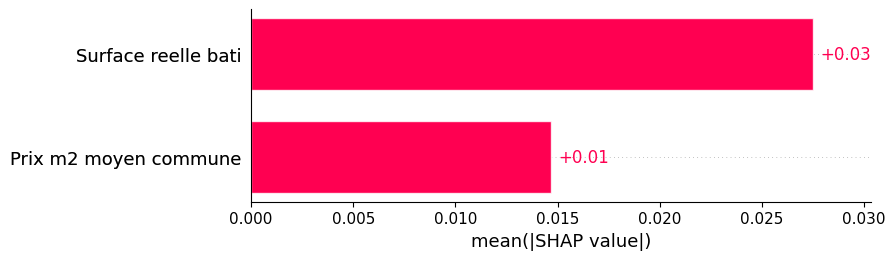

In [95]:
# Shap
import shap

#fit
g_mod = model

# Fits the explainer
explainer = shap.TreeExplainer(g_mod)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

print(clf.best_params_)

#Graph
shap.plots.bar(shap_values[:, :, 1])

{'max_depth': 10, 'min_samples_leaf': 0.20000000000000018, 'min_samples_split': 0.40000000000000013}

Nombre de pièce principale ne sert à rien dans la prediction, on peut s'en séparer

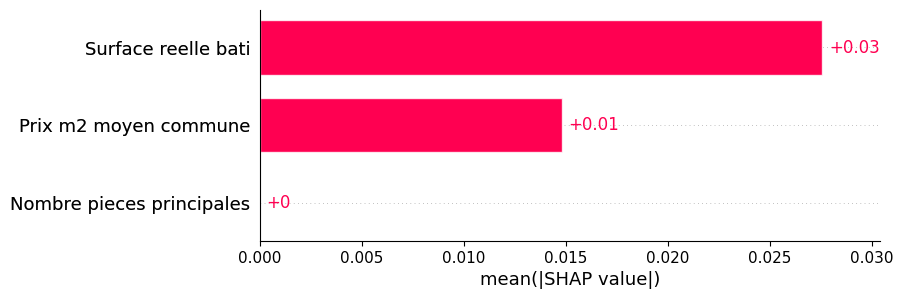